Importing the required libraries

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import pandas as pd

When the disk is rotating at a fixed angular velocity

In [104]:
_time = np.arange(0, 20, 0.001)
# _time = np.linspace(0, 20, 2000)
_fixed_omega = 400*np.pi
_fixed_omega_t = np.rad2deg(_fixed_omega*_time)
# _fixed_disp = _fixed_omega_t.cumsum() * 0.01 # displacement in radians
_fixed_disp = _fixed_omega_t # displacement in radians

Defnining the constants

In [105]:
dt = 0.00001

_time = np.arange(0, 1, dt)
_omega_o = 400 * np.pi
_omega_v = 2 * np.pi
_omega_delta = 10 * np.pi
_omega_t = _omega_o + _omega_delta * np.sin(_omega_v * _time)

_disp_t = _omega_t.cumsum() * dt # displacement in radians
_disp_t = np.rad2deg(_disp_t) # displacement in degrees

for idx, i in enumerate(_disp_t):
    if np.mod(i, 2*np.pi) == 0.:
        print(i, idx, np.mod(i, 2*np.pi), _time[idx])

In [106]:
_w_omega_t = 400*np.pi*_time - 5*np.cos(2*np.pi*_time) +5
_w_omega_t = np.rad2deg(_w_omega_t)

for idx, i in enumerate(_disp_t):
    if np.mod(i, np.rad2deg(2*np.pi))<0.0199:
        pass
        # print(i, idx, np.mod(i, np.rad2deg(2*np.pi)), _time[idx])

In [107]:
# import numpy as np
import math
def find_nearest(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return array[idx-1]
    else:
        return idx

In [108]:
pulse = np.zeros(len(_time))

trigger = False
trigger_idx = 0
true_id = 0

for idx, i in enumerate(_disp_t):
    if np.mod(i, np.rad2deg(2*np.pi))== 0:
        pulse[idx] = 1
        trigger = True
        trigger_idx = idx

    if idx < true_id:
        pulse[idx] = 1

    if trigger:
        val = _disp_t[idx] + 5
        true_id = find_nearest(_disp_t, val)


In [109]:
_est = np.zeros(len(_time))

t1 = 0

for idx, i in enumerate(_disp_t):
    if idx == 0:
        _est[idx] = 0
    if (np.mod(i, np.rad2deg(2*np.pi)) < 0.01) and idx != 0:
        print(_time[idx] - t1, i, idx)
        _est[idx] = 2*np.rad2deg(np.pi)/(_time[idx] - t1)
        t1 = _time[idx]
    else:
        _est[idx] = _est[idx-1]
    

0.029920000000000002 2160.009063512227 2992
0.24058000000000002 19800.00587406036 27050
0.72949 72000.00000000164 99999


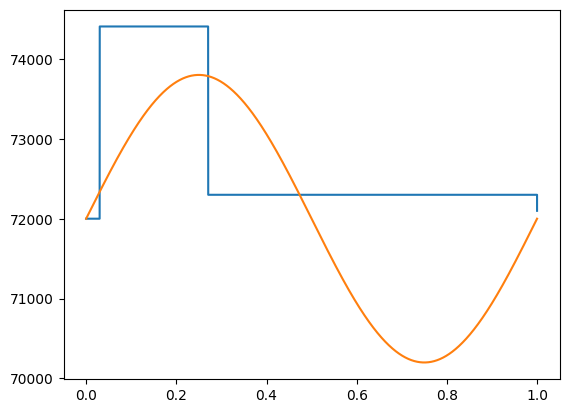

In [123]:
plt.plot(_time, _est/5 + 72000, label = 'actual')
plt.plot(_time, np.rad2deg(_omega_t))

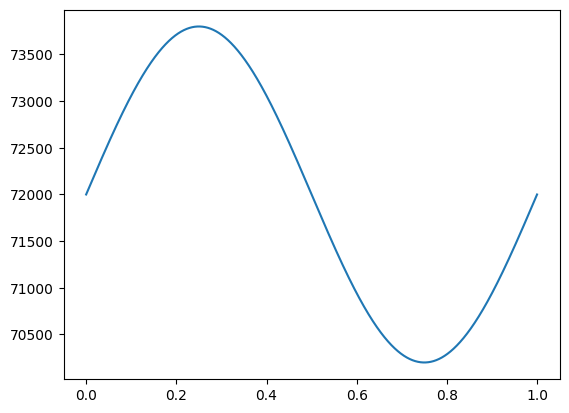

In [122]:
plt.plot(_time, np.rad2deg(_omega_t))